# Description of Physiochemical Properties 

## Univariate Linear Regression: Red Wines


In [33]:
# % matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # import statsmodels
import seaborn as sns

red_wine_data_to_load = "./wineQualityReds.csv"

red_wine_data = pd.read_csv(red_wine_data_to_load)

white_wine_data_to_load = "./wineQualityWhites.csv"

white_wine_data = pd.read_csv(white_wine_data_to_load)

In [34]:
red_wine_data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
red_wine_data = red_wine_data.drop(columns="Unnamed: 0")
red_wine_data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Observation: There are no missing cells or nans

In [36]:
white_wine_data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [37]:
white_wine_data = white_wine_data.drop(columns="Unnamed: 0")
white_wine_data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### Observation: There are no missing cells or nans

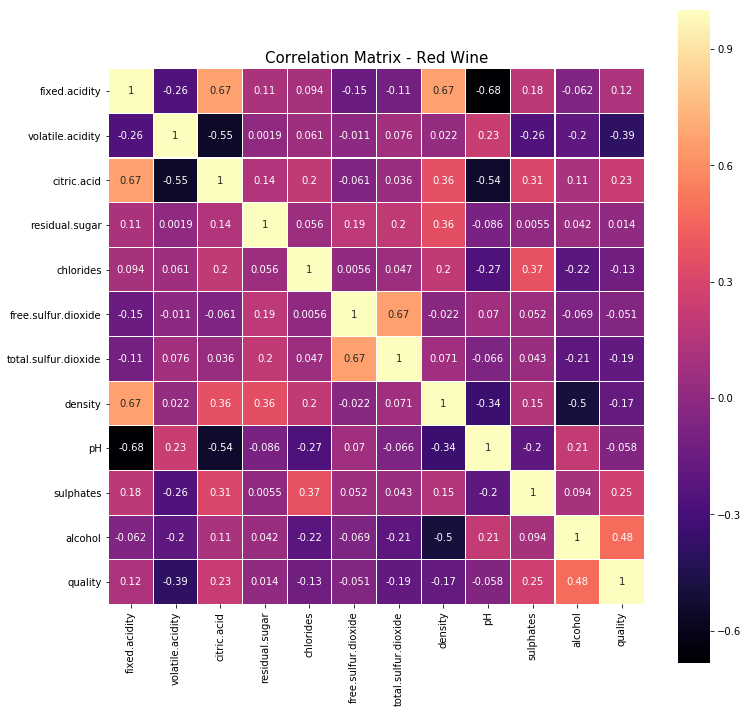

In [7]:
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix - Red Wine', y=1, size=15)
sns.heatmap(red_wine_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True, cmap = "magma")
plt.savefig("./Charts/Correlation_Matrix_Red_Wine.png")

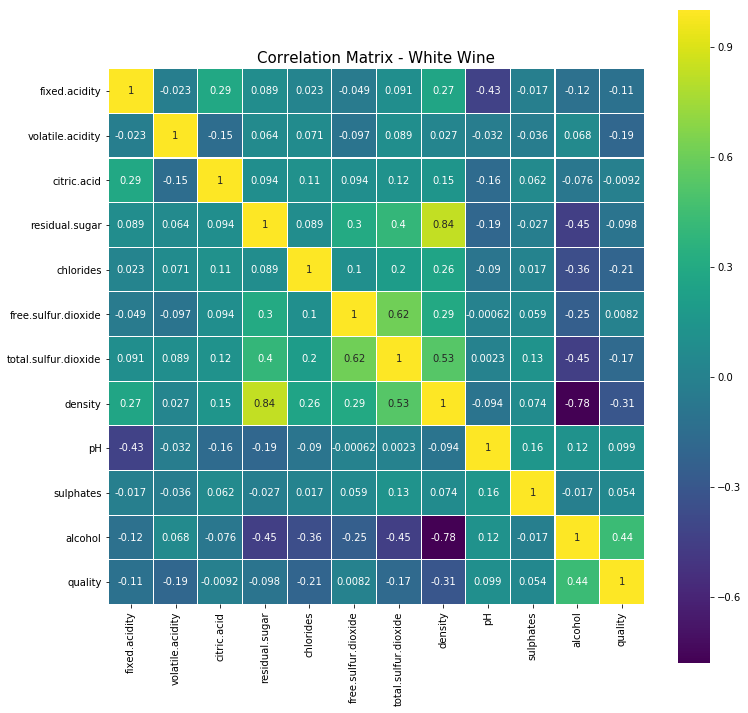

In [8]:
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix - White Wine', y=1, size=15)
sns.heatmap(white_wine_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True, cmap = "viridis")
plt.savefig("./Charts/Correlation_Matrix_White_Wine.png")

In [9]:


X = red_wine_data["fixed.acidity"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     24.96
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           6.50e-07
Time:                        19:17:13   Log-Likelihood:                -1914.2
No. Observations:                1599   AIC:                             3832.
Df Residuals:                    1597   BIC:                             3843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1573      0.098     52.684      0.000       4.965       5.349
fixed.acidity     0.0575      0.012      4.996      0.000       0.035       0.080
==============================================================================
Omnibus:                       17.047   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.553
Skew:                           0.205   Prob(JB):                     9.36e-05
Kurtosis:                       3.333   Cond. No.                         42.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X = red_wine_data["volatile.acidity"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     287.4
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.05e-59
Time:                        19:17:13   Log-Likelihood:                -1794.3
No. Observations:                1599   AIC:                             3593.
Df Residuals:                    1597   BIC:                             3603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5657      0.058    113.388      0.000       6.452       6.679
volatile.acidity    -1.7614      0.104    -16.954      0.000      -1.965      -1.558
==============================================================================
Omnibus:                       20.577   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.905
Skew:                           0.242   Prob(JB):                     1.75e-05
Kurtosis:                       3.306   Cond. No.                         7.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X = red_wine_data["citric.acid"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     86.26
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           4.99e-20
Time:                        19:17:13   Log-Likelihood:                -1884.6
No. Observations:                1599   AIC:                             3773.
Df Residuals:                    1597   BIC:                             3784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3817      0.034    159.610      0.000       5.316       5.448
citric.acid     0.9385      0.101      9.288      0.000       0.740       1.137
==============================================================================
Omnibus:                       11.279   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.967
Skew:                           0.162   Prob(JB):                      0.00252
Kurtosis:                       3.272   Cond. No.                         5.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = red_wine_data["residual.sugar"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3012
Date:                Fri, 22 Mar 2019   Prob (F-statistic):              0.583
Time:                        19:17:13   Log-Likelihood:                -1926.5
No. Observations:                1599   AIC:                             3857.
Df Residuals:                    1597   BIC:                             3868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6161      0.042    134.950      0.000       5.534       5.698
residual.sugar     0.0079      0.014      0.549      0.583      -0.020       0.036
==============================================================================
Omnibus:                       16.985   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.016
Skew:                           0.215   Prob(JB):                     0.000122
Kurtosis:                       3.292   Cond. No.                         6.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = red_wine_data["chlorides"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.99
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.31e-07
Time:                        19:17:13   Log-Likelihood:                -1913.2
No. Observations:                1599   AIC:                             3830.
Df Residuals:                    1597   BIC:                             3841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8295      0.042    137.852      0.000       5.747       5.912
chlorides     -2.2118      0.426     -5.195      0.000      -3.047      -1.377
==============================================================================
Omnibus:                       14.102   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.663
Skew:                           0.199   Prob(JB):                     0.000655
Kurtosis:                       3.249   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X = red_wine_data["free.sulfur.dioxide"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.109
Date:                Fri, 22 Mar 2019   Prob (F-statistic):             0.0428
Time:                        19:17:13   Log-Likelihood:                -1924.6
No. Observations:                1599   AIC:                             3853.
Df Residuals:                    1597   BIC:                             3864.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.6981      0.037    155.357      0.000       5.626       5.770
free.sulfur.dioxide    -0.0039      0.002     -2.027      0.043      -0.008      -0.000
==============================================================================
Omnibus:                       16.011   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.376
Skew:                           0.197   Prob(JB):                     0.000169
Kurtosis:                       3.324   Cond. No.                         34.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = red_wine_data["total.sulfur.dioxide"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     56.66
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           8.62e-14
Time:                        19:17:13   Log-Likelihood:                -1898.8
No. Observations:                1599   AIC:                             3802.
Df Residuals:                    1597   BIC:                             3812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8472      0.034    170.140      0.000       5.780       5.915
total.sulfur.dioxide    -0.0045      0.001     -7.527      0.000      -0.006      -0.003
==============================================================================
Omnibus:                       20.665   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.817
Skew:                           0.117   Prob(JB):                     2.03e-07
Kurtosis:                       3.638   Cond. No.                         98.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = red_wine_data["density"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     50.41
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           1.87e-12
Time:                        19:17:13   Log-Likelihood:                -1901.8
No. Observations:                1599   AIC:                             3808.
Df Residuals:                    1597   BIC:                             3818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2385     10.508      7.636      0.000      59.628     100.849
density      -74.8460     10.542     -7.100      0.000     -95.524     -54.168
==============================================================================
Omnibus:                       13.878   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.259
Skew:                           0.174   Prob(JB):                     0.000486
Kurtosis:                       3.329   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X = red_wine_data["pH"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.340
Date:                Fri, 22 Mar 2019   Prob (F-statistic):             0.0210
Time:                        19:17:13   Log-Likelihood:                -1924.0
No. Observations:                1599   AIC:                             3852.
Df Residuals:                    1597   BIC:                             3863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6359      0.433     15.320      0.000       5.786       7.486
pH            -0.3020      0.131     -2.311      0.021      -0.558      -0.046
==============================================================================
Omnibus:                       16.478   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.084
Skew:                           0.222   Prob(JB):                     0.000195
Kurtosis:                       3.244   Cond. No.                         77.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X = red_wine_data["sulphates"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     107.7
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           1.80e-24
Time:                        19:17:13   Log-Likelihood:                -1874.4
No. Observations:                1599   AIC:                             3753.
Df Residuals:                    1597   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8477      0.078     61.818      0.000       4.694       5.002
sulphates      1.1977      0.115     10.380      0.000       0.971       1.424
==============================================================================
Omnibus:                       12.685   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.098
Skew:                           0.083   Prob(JB):                     0.000194
Kurtosis:                       3.479   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X = red_wine_data["alcohol"] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           2.83e-91
Time:                        19:17:13   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multivariate Linear Regression: Red Wines

In [20]:

X = red_wine_data[["fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol"]] ## X usually means our input variables (or independent variables)
y = red_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          1.79e-145
Time:                        19:17:13   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed.acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile.acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric.acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual.sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free.sulfur.dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total.sulfur.dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Univariate Linear Regression: White Wines

In [21]:
X = white_wine_data["fixed.acidity"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     64.08
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           1.48e-15
Time:                        19:17:13   Log-Likelihood:                -6322.8
No. Observations:                4898   AIC:                         1.265e+04
Df Residuals:                    4896   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.6956      0.103     65.057      0.000       6.494       6.897
fixed.acidity    -0.1193      0.015     -8.005      0.000      -0.149      -0.090
==============================================================================
Omnibus:                       29.986   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.513
Skew:                           0.166   Prob(JB):                     1.44e-07
Kurtosis:                       3.211   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = white_wine_data["volatile.acidity"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     193.0
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           4.67e-43
Time:                        19:17:14   Log-Likelihood:                -6260.0
No. Observations:                4898   AIC:                         1.252e+04
Df Residuals:                    4896   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.3540      0.036    174.320      0.000       6.283       6.425
volatile.acidity    -1.7109      0.123    -13.891      0.000      -1.952      -1.469
==============================================================================
Omnibus:                       76.271   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.657
Skew:                           0.268   Prob(JB):                     4.14e-19
Kurtosis:                       3.357   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = white_wine_data["citric.acid"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4153
Date:                Fri, 22 Mar 2019   Prob (F-statistic):              0.519
Time:                        19:17:14   Log-Likelihood:                -6354.4
No. Observations:                4898   AIC:                         1.271e+04
Df Residuals:                    4896   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.9004      0.037    158.736      0.000       5.828       5.973
citric.acid    -0.0674      0.105     -0.644      0.519      -0.272       0.138
==============================================================================
Omnibus:                       27.428   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.026
Skew:                           0.154   Prob(JB):                     4.98e-07
Kurtosis:                       3.217   Cond. No.                         9.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
X = white_wine_data["residual.sugar"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     47.06
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           7.72e-12
Time:                        19:17:14   Log-Likelihood:                -6331.2
No. Observations:                4898   AIC:                         1.267e+04
Df Residuals:                    4896   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.9868      0.020    295.447      0.000       5.947       6.027
residual.sugar    -0.0170      0.002     -6.860      0.000      -0.022      -0.012
==============================================================================
Omnibus:                       25.795   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.066
Skew:                           0.126   Prob(JB):                     4.88e-07
Kurtosis:                       3.281   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = white_wine_data["chlorides"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     225.7
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           6.51e-50
Time:                        19:17:14   Log-Likelihood:                -6244.2
No. Observations:                4898   AIC:                         1.249e+04
Df Residuals:                    4896   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2674      0.029    218.166      0.000       6.211       6.324
chlorides     -8.5100      0.566    -15.024      0.000      -9.620      -7.400
==============================================================================
Omnibus:                       23.609   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.746
Skew:                           0.116   Prob(JB):                     1.56e-06
Kurtosis:                       3.277   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X = white_wine_data["free.sulfur.dioxide"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3259
Date:                Fri, 22 Mar 2019   Prob (F-statistic):              0.568
Time:                        19:17:14   Log-Likelihood:                -6354.5
No. Observations:                4898   AIC:                         1.271e+04
Df Residuals:                    4896   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8629      0.029    201.025      0.000       5.806       5.920
free.sulfur.dioxide     0.0004      0.001      0.571      0.568      -0.001       0.002
==============================================================================
Omnibus:                       27.869   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.413
Skew:                           0.157   Prob(JB):                     4.10e-07
Kurtosis:                       3.214   Cond. No.                         90.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = white_wine_data["total.sulfur.dioxide"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     154.2
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           6.99e-35
Time:                        19:17:14   Log-Likelihood:                -6278.7
No. Observations:                4898   AIC:                         1.256e+04
Df Residuals:                    4896   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.3817      0.042    150.356      0.000       6.299       6.465
total.sulfur.dioxide    -0.0036      0.000    -12.418      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       27.910   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                           0.094   Prob(JB):                     2.22e-08
Kurtosis:                       3.371   Cond. No.                         493.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X = white_wine_data["density"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     509.9
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          1.73e-107
Time:                        19:17:14   Log-Likelihood:                -6112.0
No. Observations:                4898   AIC:                         1.223e+04
Df Residuals:                    4896   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.2771      4.003     24.049      0.000      88.429     104.125
density      -90.9424      4.027    -22.581      0.000     -98.838     -83.047
==============================================================================
Omnibus:                       56.162   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.563
Skew:                           0.099   Prob(JB):                     9.68e-20
Kurtosis:                       3.624   Cond. No.                         665.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = white_wine_data["pH"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     48.88
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           3.08e-12
Time:                        19:17:14   Log-Likelihood:                -6330.3
No. Observations:                4898   AIC:                         1.266e+04
Df Residuals:                    4896   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0187      0.266     15.095      0.000       3.497       4.541
pH             0.5832      0.083      6.992      0.000       0.420       0.747
==============================================================================
Omnibus:                       26.367   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.569
Skew:                           0.142   Prob(JB):                     6.26e-07
Kurtosis:                       3.244   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X = white_wine_data["sulphates"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.15
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           0.000171
Time:                        19:17:14   Log-Likelihood:                -6347.6
No. Observations:                4898   AIC:                         1.270e+04
Df Residuals:                    4896   BIC:                         1.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6739      0.056    101.863      0.000       5.565       5.783
sulphates      0.4166      0.111      3.761      0.000       0.199       0.634
==============================================================================
Omnibus:                       30.264   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.270
Skew:                           0.161   Prob(JB):                     9.83e-08
Kurtosis:                       3.233   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = white_wine_data["alcohol"] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          5.61e-226
Time:                        19:17:14   Log-Likelihood:                -5839.4
No. Observations:                4898   AIC:                         1.168e+04
Df Residuals:                    4896   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5820      0.098     26.345      0.000       2.390       2.774
alcohol        0.3135      0.009     33.858      0.000       0.295       0.332
==============================================================================
Omnibus:                       88.780   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.233
Skew:                           0.031   Prob(JB):                     7.29e-40
Kurtosis:                       3.938   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multivariate Linear Regression: White Wines

In [32]:
X = white_wine_data[["fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol"]] ## X usually means our input variables (or independent variables)
y = white_wine_data["quality"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:17:14   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed.acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile.acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric.acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual.sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free.sulfur.dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total.sulfur.dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""